# Classification

In [1]:
#classification
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, 
                     cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, 
                           colorscale=colorscale, cdiscrete=cdiscrete, 
                           psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

In [2]:
dflog=pd.read_csv("data/01_heights_weights_genders.csv")

In [3]:
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


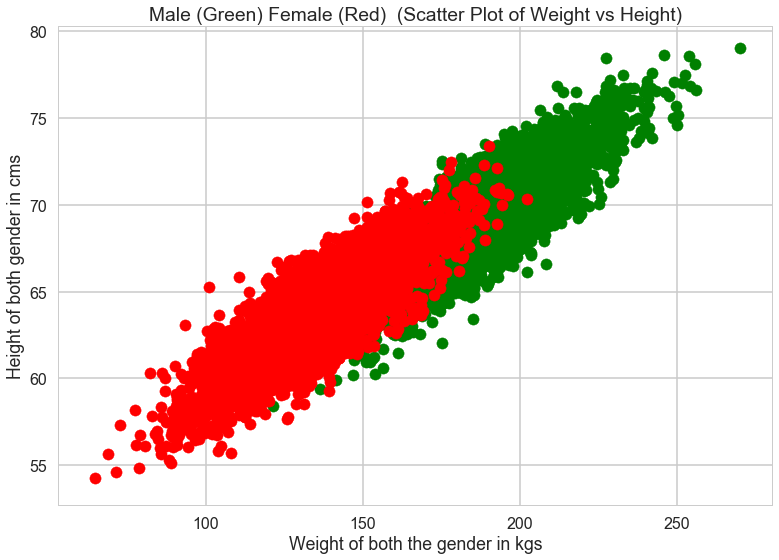

In [4]:
plt.scatter(dflog.Weight[dflog.Gender=='Male'],dflog.Height[dflog.Gender=='Male'],color='g')
plt.scatter(dflog.Weight[dflog.Gender=='Female'],dflog.Height[dflog.Gender=='Female'],color='r')
plt.xlabel("Weight of both the gender in kgs")
plt.ylabel("Height of both gender in cms")
plt.title("Male (Green) Female (Red)  (Scatter Plot of Weight vs Height)")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
xlr,xtestlr,ylr,ytestlr=train_test_split(dflog[['Height','Weight']].values,(dflog.Gender=='Male').values,random_state=5)

In [7]:
clf=LogisticRegression()

In [8]:
clf.fit(xlr,ylr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print (accuracy_score(clf.predict(xtestlr),ytestlr))

0.9252


In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
def cv_score(clf,x,y,score_func=accuracy_score):
    result=0
    nfold=5
    for train,test in KFold(nfold).split(x):
        clf.fit(x[train],y[train])
        result+=score_func(clf.predict(x[test]),y[test])
    return result/nfold

In [11]:
clf=LogisticRegression()
score=cv_score(clf,xlr,ylr)

In [12]:
print score

0.917066666667


In [14]:
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
score=[]
for C in Cs:
    clf=LogisticRegression()
    clf.C=C
    
    score.append(cv_score(clf,xlr,ylr))
highest_c=Cs[score.index(max(score))]
print 'The highest score for C is :%s' % highest_c


The highest score for C is :0.1


In [26]:
clf=LogisticRegression()
clf.C=highest_c
clf.fit(xlr,ylr)
print accuracy_score(clf.predict(xtestlr),ytestlr)

0.9252


In [31]:
from sklearn.grid_search import GridSearchCV
clf1=LogisticRegression()
highest_c={"C":[0.0001,0.001,0.1,1,10,100]}
model=GridSearchCV(clf1,param_grid=highest_c,cv=5,scoring="accuracy")
model.fit(xlr,ylr)
model.best_estimator_,model.best_params_,model.best_score_,model.grid_scores_

(LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 0.001},
 0.9172,
 [mean: 0.91533, std: 0.00321, params: {'C': 0.0001},
  mean: 0.91720, std: 0.00230, params: {'C': 0.001},
  mean: 0.91693, std: 0.00235, params: {'C': 0.1},
  mean: 0.91693, std: 0.00235, params: {'C': 1},
  mean: 0.91693, std: 0.00235, params: {'C': 10},
  mean: 0.91693, std: 0.00235, params: {'C': 100}])

In [32]:
clf1=LogisticRegression(C=model.best_params_['C'])
clf1.fit(xlr,ylr)
pred1=clf1.predict(xtestlr)
accuracy_score(pred1,ytestlr)

0.92559999999999998

In [33]:
def cv_optimize(clf,paramters,Xtrain,ytrain,n_folds=5):
    gs=sklearn.model_selection.GridSearch(clf,param_grid=prameters,cv=n_folds)
    gs.fit(Xtrain,ytrain)
    print("Best Params",gs.best_params_)
    best=gs.best_estimator_
    return best